In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from sklearn.datasets import load_iris
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:
data = pd.DataFrame(load_iris().data , columns=load_iris().feature_names)
target = load_iris().target

In [31]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [33]:
grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
params = GridSearchCV(model, grid, cv=5, n_jobs=-1)
params.fit(X_train,y_train)
params.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}

In [36]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)

In [37]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

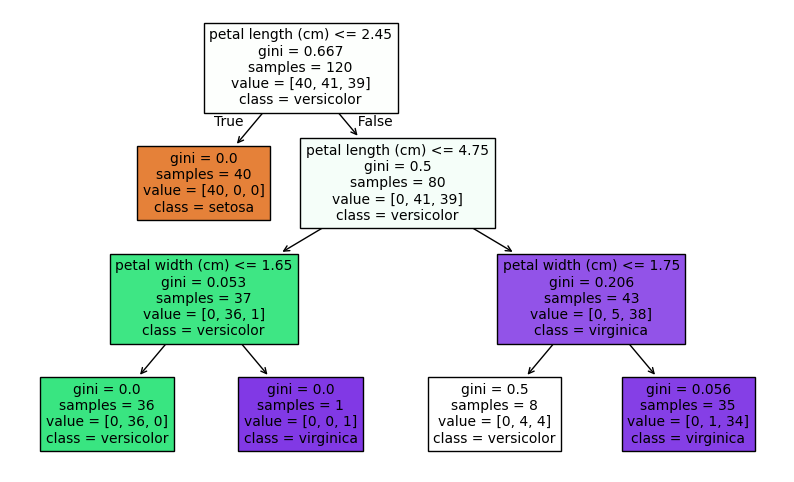

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=data.columns, class_names=load_iris().target_names)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [46]:
from sklearn.ensemble import RandomForestClassifier
grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 6, 7, 8,],
    'min_samples_split': [3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4]
}
params_rf = GridSearchCV(RandomForestClassifier(), grid_rf, cv=5, n_jobs=-1)

In [47]:
params_rf.fit(X_train,y_train)
params_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

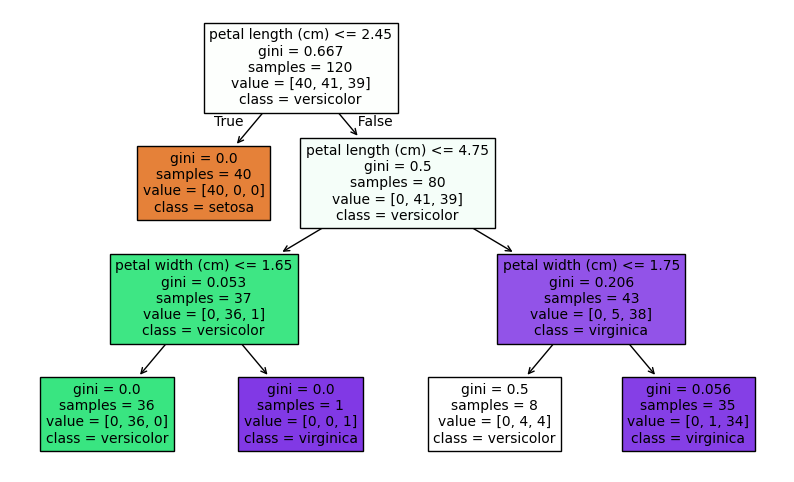

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=data.columns, class_names=load_iris().target_names)
plt.show()

In [50]:
model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=4, min_samples_leaf=2)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

